In [1]:
import lecilab_behavior_analysis.utils as utils
import lecilab_behavior_analysis.df_transforms as dft
import lecilab_behavior_analysis.plots as plots
from pathlib import Path
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
tv_projects = utils.get_server_projects()
animals = utils.get_animals_in_project(tv_projects[1])
animals_to_remove = ['test', 'test2']
animals = [animal for animal in animals if animal not in animals_to_remove]
print(f"Animals in project {tv_projects[1]}: {animals}")
# retrieve the data for the remaining animals
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    # create the directory if it doesn't exist
    local_path.mkdir(parents=True, exist_ok=True)
    # download the session data
    utils.rsync_cluster_data(
        project_name=tv_projects[1],
        file_path="sessions/{}/{}.csv".format(mouse, mouse),
        local_path=str(local_path),
        credentials=utils.get_idibaps_cluster_credentials(),
    )

Animals in project visual_and_COT_data: ['ACV001', 'ACV002', 'ACV003', 'ACV004', 'ACV005', 'ACV006', 'ACV007', 'ACV008', 'ACV009', 'ACV010']
receiving incremental file list
ACV001.csv

sent 125,753 bytes  received 1,176,288 bytes  104,163.28 bytes/sec
total size is 328,959,244  speedup is 252.65
receiving incremental file list
ACV002.csv

sent 110,829 bytes  received 2,627,442 bytes  202,834.89 bytes/sec
total size is 267,179,818  speedup is 97.57
receiving incremental file list
ACV003.csv

sent 121,882 bytes  received 3,211,148 bytes  246,891.11 bytes/sec
total size is 323,325,534  speedup is 97.01
receiving incremental file list
ACV004.csv

sent 106,965 bytes  received 43,585,763 bytes  4,599,234.53 bytes/sec
total size is 254,191,430  speedup is 5.82
receiving incremental file list
ACV005.csv

sent 104,550 bytes  received 3,182,478 bytes  346,002.95 bytes/sec
total size is 242,221,655  speedup is 73.69
receiving incremental file list
ACV006.csv

sent 106,503 bytes  received 5,096,12

In [3]:
df_list = []
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")
    df_list.append(df)
    print(f"Loaded data for {mouse}.")
# concatenate the dataframes
df = pd.concat(df_list, ignore_index=True)

/tmp/ipykernel_37786/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV001.


/tmp/ipykernel_37786/287582578.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV002.


/tmp/ipykernel_37786/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV003.


/tmp/ipykernel_37786/287582578.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV004.


/tmp/ipykernel_37786/287582578.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV005.


/tmp/ipykernel_37786/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV006.


/tmp/ipykernel_37786/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV007.


/tmp/ipykernel_37786/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV008.


/tmp/ipykernel_37786/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV009.


/tmp/ipykernel_37786/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV010.


In [4]:
# select only the visual easy task
df2afc = df[df['current_training_stage'] == 'TwoAFC_visual_easy']

In [6]:
df2afc = utils.add_time_from_session_start(df2afc)

df_subject_list = []
for mouse in animals:
    df_mouse = df2afc[df2afc['subject'] == mouse].copy()
    df_mouse = dft.get_performance_through_trials(df_mouse, window=25)
    df_subject_list.append(df_mouse)

df2afc = pd.concat(df_subject_list, ignore_index=True)

In [7]:
# select only the trials with a performance above 0.75
# TODO: fix this so that this applies to the entire session
df2afc = df2afc[df2afc['performance_w'] > 75]

## Trial duration analysis

In [8]:
# do it with trial duration
df2afc = dft.add_trial_duration_column_to_df(df2afc)

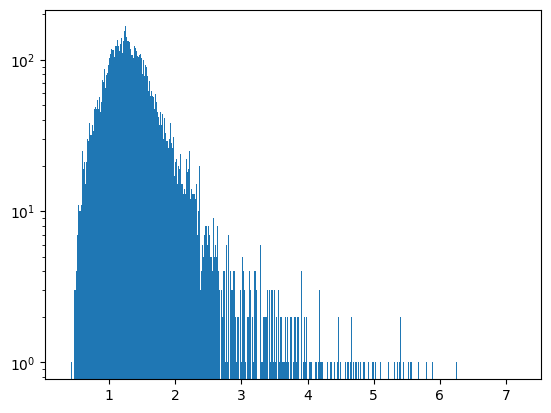

In [9]:
plt.hist(np.log(df2afc['trial_duration']), bins=10000)
# plt.xlim(0, 15)
plt.yscale('log')
plt.show()

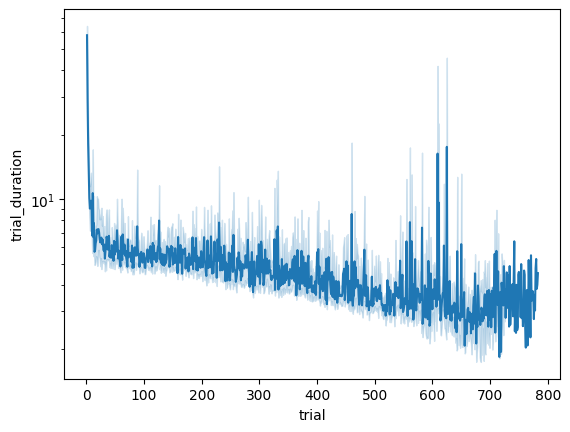

In [10]:
# trial duration vs trial number
sns.lineplot(data=df2afc, x='trial', y='trial_duration')
plt.yscale('log')
plt.show()

why does trial duration decrease with trial number? number of pokes in port2?

In [ ]:
df2afc["port2_holds"] = df2afc.apply(lambda row: utils.get_trial_port_hold(row, 2), axis=1)
df2afc["port2_holds_number"] = df2afc.port2_holds.apply(len)
sns.lineplot(data=df2afc, x='trial', y='port2_holds_number')
plt.show()

not really... Not sure why this is 

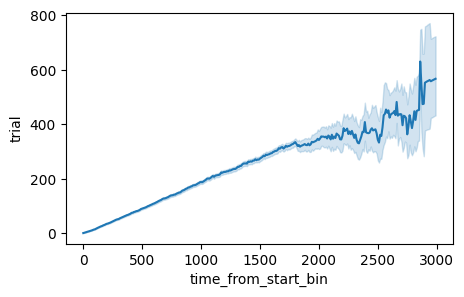

In [13]:
# engagement over the session
df2afc["time_from_start_bin"] = df2afc["time_from_start"] // 10 * 10
df2afc_cumulative = df2afc.groupby(["time_from_start_bin", "date"])["trial"].max().reset_index()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
sns.lineplot(data=df2afc_cumulative, x='time_from_start_bin', y='trial', ax=axs)
plt.show()

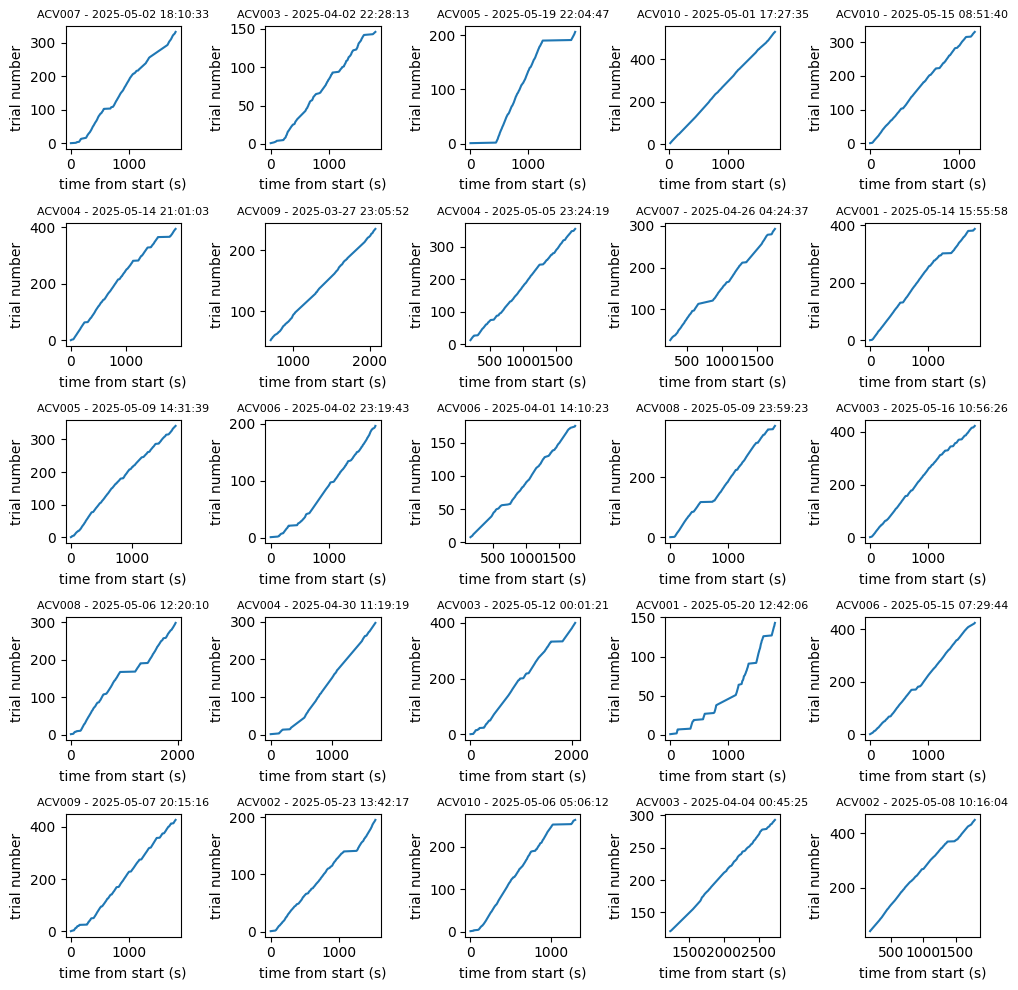

In [14]:
# select random sessions to plot this, with a minimum of 100 trials
df2afc_sessions = df2afc.groupby(['subject', 'session']).filter(lambda x: len(x) > 100)
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10,10))
axs = axs.flatten()
for i in range(len(axs)):
    # select a random subject and session
    subject = np.random.choice(df2afc_sessions['subject'].unique())
    session = np.random.choice(df2afc_sessions[df2afc_sessions['subject'] == subject]['session'].unique())
    session_data = df2afc_sessions[(df2afc_sessions['subject'] == subject) & (df2afc_sessions['session'] == session)]

    sns.lineplot(data=session_data, x='time_from_start', y='trial', ax=axs[i])
    axs[i].set_title(f"{subject} - {session_data['date'].iloc[0]}", fontsize=8)
    axs[i].set_xlabel('time from start (s)')
    axs[i].set_ylabel('trial number')

plt.tight_layout()
plt.show()

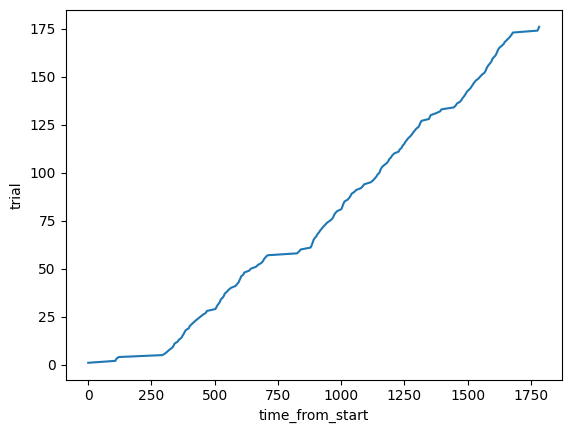

In [15]:
mouse = "ACV008"
date = "2025-04-04 12:04:52"
# select the data for the specific mouse and date
df_mouse = df2afc[(df2afc['subject'] == mouse) & (df2afc['date'] == date)]
sns.lineplot(data=df_mouse, x='time_from_start', y='trial')
plt.show()

In [ ]:
# get the median and std of the log of the inter_trial_interval
# Explicitly create a copy to avoid SettingWithCopyWarning
df_mouse['td_log'] = df_mouse.copy()["trial_duration"].apply(lambda x: np.log(x))
median_iti_log = df_mouse['td_log'].median()
std_iti_log = df_mouse['td_log'].std()

# classify trials as engaged or not engaged depending on the iti_log
df_mouse['engaged'] = df_mouse['td_log'] < (median_iti_log + 2 * std_iti_log)

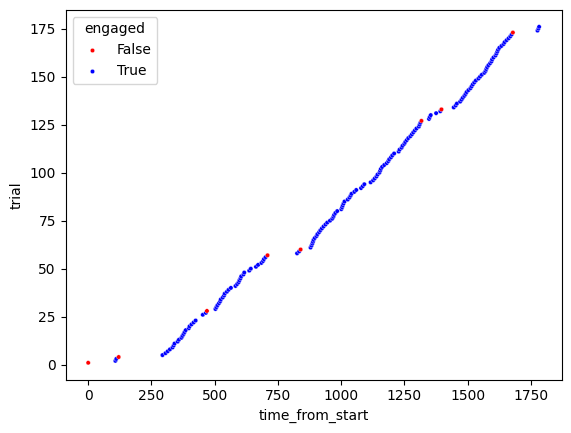

In [21]:
sns.scatterplot(data=df_mouse, x='time_from_start', y='trial', hue='engaged', palette={True: 'blue', False: 'red'}, s=10)
plt.show()

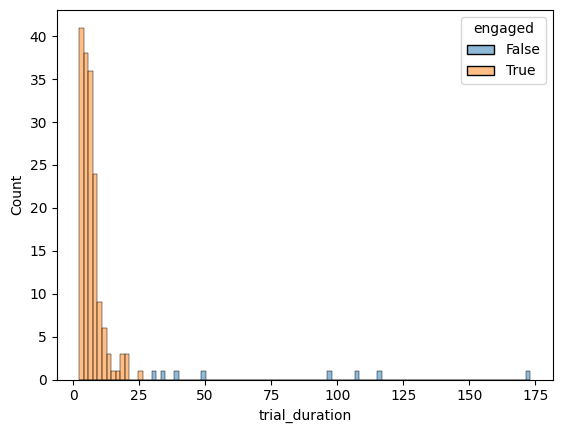

In [22]:
sns.histplot(data=df_mouse, x='trial_duration', bins=100, hue='engaged')
plt.show()

### divide the session time into:
#### - engaged
#### - disengaged
#### - time to complete the first trial
#### - time from last trial to leave the box

### the end of the session is stored in a different dataset: events

In [23]:
# the session duration needs to be computed from the events, not from the sessions_summary_df
# load all the past events data
utils.rsync_cluster_data(
    project_name=tv_projects[1],
    file_path="old_events",
    local_path=str(local_path),
    credentials=utils.get_idibaps_cluster_credentials(),
)
utils.rsync_cluster_data(
    project_name=tv_projects[1],
    file_path="events.csv",
    local_path=str(local_path),
    credentials=utils.get_idibaps_cluster_credentials(),
)

receiving incremental file list
old_events/
old_events/events_20250313_112711.csv
old_events/events_20250326_193027.csv
old_events/events_20250510_133014.csv
old_events/events_20250602_014911.csv
old_events/
old_events/events_20250313_112711.csv
old_events/events_20250326_193027.csv
old_events/events_20250510_133014.csv
old_events/events_20250602_014911.csv
old_events/events_20250702_202516.csv

sent 123 bytes  received 963,785 bytes  385,563.20 bytes/sec
total size is 12,879,798  speedup is 13.36
old_events/events_20250702_202516.csv

sent 123 bytes  received 963,785 bytes  385,563.20 bytes/sec
total size is 12,879,798  speedup is 13.36
receiving incremental file list
events.csv
receiving incremental file list
events.csv

sent 43 bytes  received 247,429 bytes  98,988.80 bytes/sec
total size is 2,541,900  speedup is 10.27

sent 43 bytes  received 247,429 bytes  98,988.80 bytes/sec
total size is 2,541,900  speedup is 10.27


receiving incremental file list
old_events/
old_events/events_20250313_112711.csv
old_events/events_20250326_193027.csv
old_events/events_20250510_133014.csv
old_events/events_20250602_014911.csv
old_events/
old_events/events_20250313_112711.csv
old_events/events_20250326_193027.csv
old_events/events_20250510_133014.csv
old_events/events_20250602_014911.csv
old_events/events_20250702_202516.csv

sent 123 bytes  received 963,785 bytes  385,563.20 bytes/sec
total size is 12,879,798  speedup is 13.36
old_events/events_20250702_202516.csv

sent 123 bytes  received 963,785 bytes  385,563.20 bytes/sec
total size is 12,879,798  speedup is 13.36
receiving incremental file list
events.csv
receiving incremental file list
events.csv

sent 43 bytes  received 247,429 bytes  98,988.80 bytes/sec
total size is 2,541,900  speedup is 10.27

sent 43 bytes  received 247,429 bytes  98,988.80 bytes/sec
total size is 2,541,900  speedup is 10.27


True

In [24]:
events_df = utils.load_all_events(project_name=tv_projects[1])

In [25]:
# find the end events for all the dates in df2afc using apply method
session_duration_df = df2afc.groupby('date')['subject'].first().reset_index(drop=False)
session_duration_df["end_of_session_result_search"]= session_duration_df.apply(lambda x: utils.find_next_end_task_time_in_events(events_df, x['date'], x['subject']), axis=1)

Subject mismatch for 2025-04-02 08:44:36: expected ACV001, found ACV003.


In [26]:
session_duration_df["end_of_task"] = session_duration_df["end_of_session_result_search"].apply(lambda x: x[0])
session_duration_df["duration"] = session_duration_df["end_of_session_result_search"].apply(lambda x: x[1])
# drop end_of_session_result_search
session_duration_df.drop(columns=["end_of_session_result_search"], inplace=True)

In [29]:
# replace any None entry by a nan
session_duration_df.replace({None: np.nan}, inplace=True)
# drop nans
session_duration_df.dropna(inplace=True)

In [ ]:
engagement_sd_criteria = 2
df2afc = df[df['current_training_stage'] == 'TwoAFC_visual_easy']
df2afc = dft.add_trial_duration_column_to_df(df2afc)

for subject in df2afc['subject'].unique():
    df_mouse = df2afc[df2afc['subject'] == subject].copy()
    df_mouse = dft.add_engagement_column(df_mouse, engagement_sd_criteria=engagement_sd_criteria)
    df2afc.loc[df2afc['subject'] == subject, 'engaged'] = df_mouse['engaged']

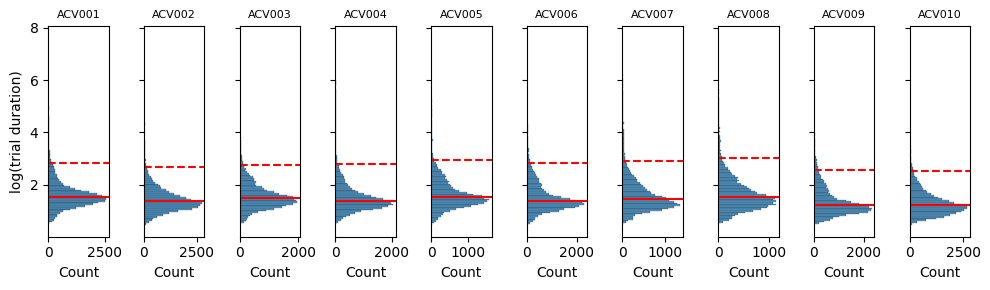

In [66]:
fig, axs = plt.subplots(ncols=len(df2afc.subject.unique()), nrows=1, figsize=(10, 3), sharey=True)
axs = axs.ravel()
for i, subject in enumerate(df2afc.subject.unique()):
    df_mouse = df2afc[df2afc['subject'] == subject].copy()
    df_mouse['td_log'] = np.log(df_mouse['trial_duration'])
    sns.histplot(data=df_mouse, y='td_log', ax=axs[i], bins=100)
    # horizontal line at the median
    median_td_log = df_mouse['td_log'].median()
    std_td_log = df_mouse['td_log'].std()
    axs[i].axhline(median_td_log, color='red', linestyle='-')
    axs[i].axhline(median_td_log + engagement_sd_criteria * std_td_log, color='red', linestyle='--')
    # axs[i].axhline(median_td_log - engagement_sd_criteria * std_td_log, color='red', linestyle='--')
    axs[i].set_title(subject, fontsize=8)
    axs[i].set_ylabel('log(trial duration)')
plt.tight_layout()
plt.show()

In [34]:
# check these differences per mouse between day and night
def is_day_session(date: str) -> bool:
    """
    Check if the session is a day session based on the date.
    """
    hour = int(date.split(" ")[1].split(":")[0])
    return 8 <= hour < 19  # Daytime is considered from 8 AM to 8 PM

In [35]:
df2afc['day_session'] = df2afc['date'].apply(is_day_session)

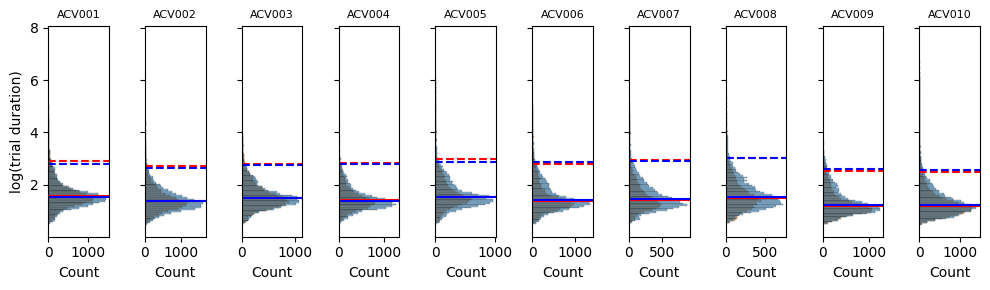

In [37]:
fig, axs = plt.subplots(ncols=len(df2afc.subject.unique()), nrows=1, figsize=(10, 3), sharey=True)
axs = axs.ravel()
for i, subject in enumerate(df2afc.subject.unique()):
    df_mouse = df2afc[df2afc['subject'] == subject].copy()
    df_mouse['td_log'] = np.log(df_mouse['trial_duration'])
    sns.histplot(data=df_mouse, y='td_log', hue='day_session', ax=axs[i], bins=100)
    # horizontal line at the median
    median_td_log_day = df_mouse[df_mouse['day_session']]['td_log'].median()
    median_td_log_night = df_mouse[~df_mouse['day_session']]['td_log'].median()
    std_td_log_day = df_mouse[df_mouse['day_session']]['td_log'].std()
    std_td_log_night = df_mouse[~df_mouse['day_session']]['td_log'].std()
    axs[i].axhline(median_td_log_day, color='red', linestyle='-')
    axs[i].axhline(median_td_log_day + engagement_sd_criteria * std_td_log_day, color='red', linestyle='--')
    axs[i].axhline(median_td_log_night, color='blue', linestyle='-')
    axs[i].axhline(median_td_log_night + engagement_sd_criteria * std_td_log_night, color='blue', linestyle='--')
    axs[i].set_title(subject, fontsize=8)
    axs[i].set_ylabel('log(trial duration)')
    # remove legend
    axs[i].get_legend().remove()

plt.tight_layout()
plt.show()

In [62]:
gsbu_dfs = []
for date in df2afc['date'].unique():
    if date not in session_duration_df['date'].values:
        print(f"Date {date} not found in session_duration_df. Skipping.")
        continue
    df_session = df2afc[df2afc['date'] == date]
    session_duration = session_duration_df[session_duration_df['date'] == date].duration.values[0]
    gsbu_dfs.append(utils.get_session_box_usage(df_session, session_duration=session_duration))
gsbu_df = pd.concat(gsbu_dfs, ignore_index=True)

Date 2025-03-16 00:29:14 not found in session_duration_df. Skipping.
Date 2025-03-16 20:11:41 not found in session_duration_df. Skipping.
Date 2025-03-17 08:58:16 not found in session_duration_df. Skipping.
Date 2025-03-17 17:52:10 not found in session_duration_df. Skipping.
Date 2025-03-18 00:42:55 not found in session_duration_df. Skipping.
Date 2025-03-18 11:29:34 not found in session_duration_df. Skipping.
Date 2025-03-19 02:21:51 not found in session_duration_df. Skipping.
Date 2025-03-19 14:29:56 not found in session_duration_df. Skipping.
Date 2025-03-19 23:55:14 not found in session_duration_df. Skipping.
Date 2025-03-20 09:38:08 not found in session_duration_df. Skipping.
Date 2025-03-20 18:31:17 not found in session_duration_df. Skipping.
Date 2025-03-21 03:37:21 not found in session_duration_df. Skipping.
Date 2025-03-21 09:57:58 not found in session_duration_df. Skipping.
Date 2025-03-21 15:37:02 not found in session_duration_df. Skipping.
Date 2025-03-22 01:46:22 not found

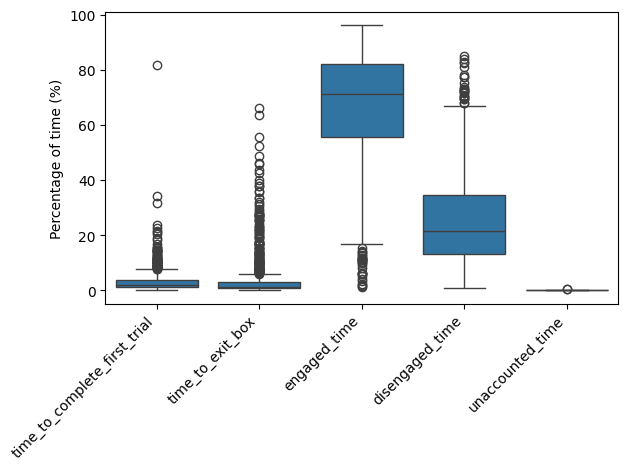

In [63]:
sns.boxplot(data=gsbu_df, x='time_type', y='percentage_of_time')
plt.xticks(rotation=45)
# remove legend
plt.legend([],[], frameon=False)
# plt.yscale('log')
plt.ylabel('Percentage of time (%)')
# align x ticks to the end
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.tight_layout()
# plt.show()
# save figure as .pdf
plt.savefig('figures/hmv_engagement_boxplot.pdf', bbox_inches='tight', transparent=True)

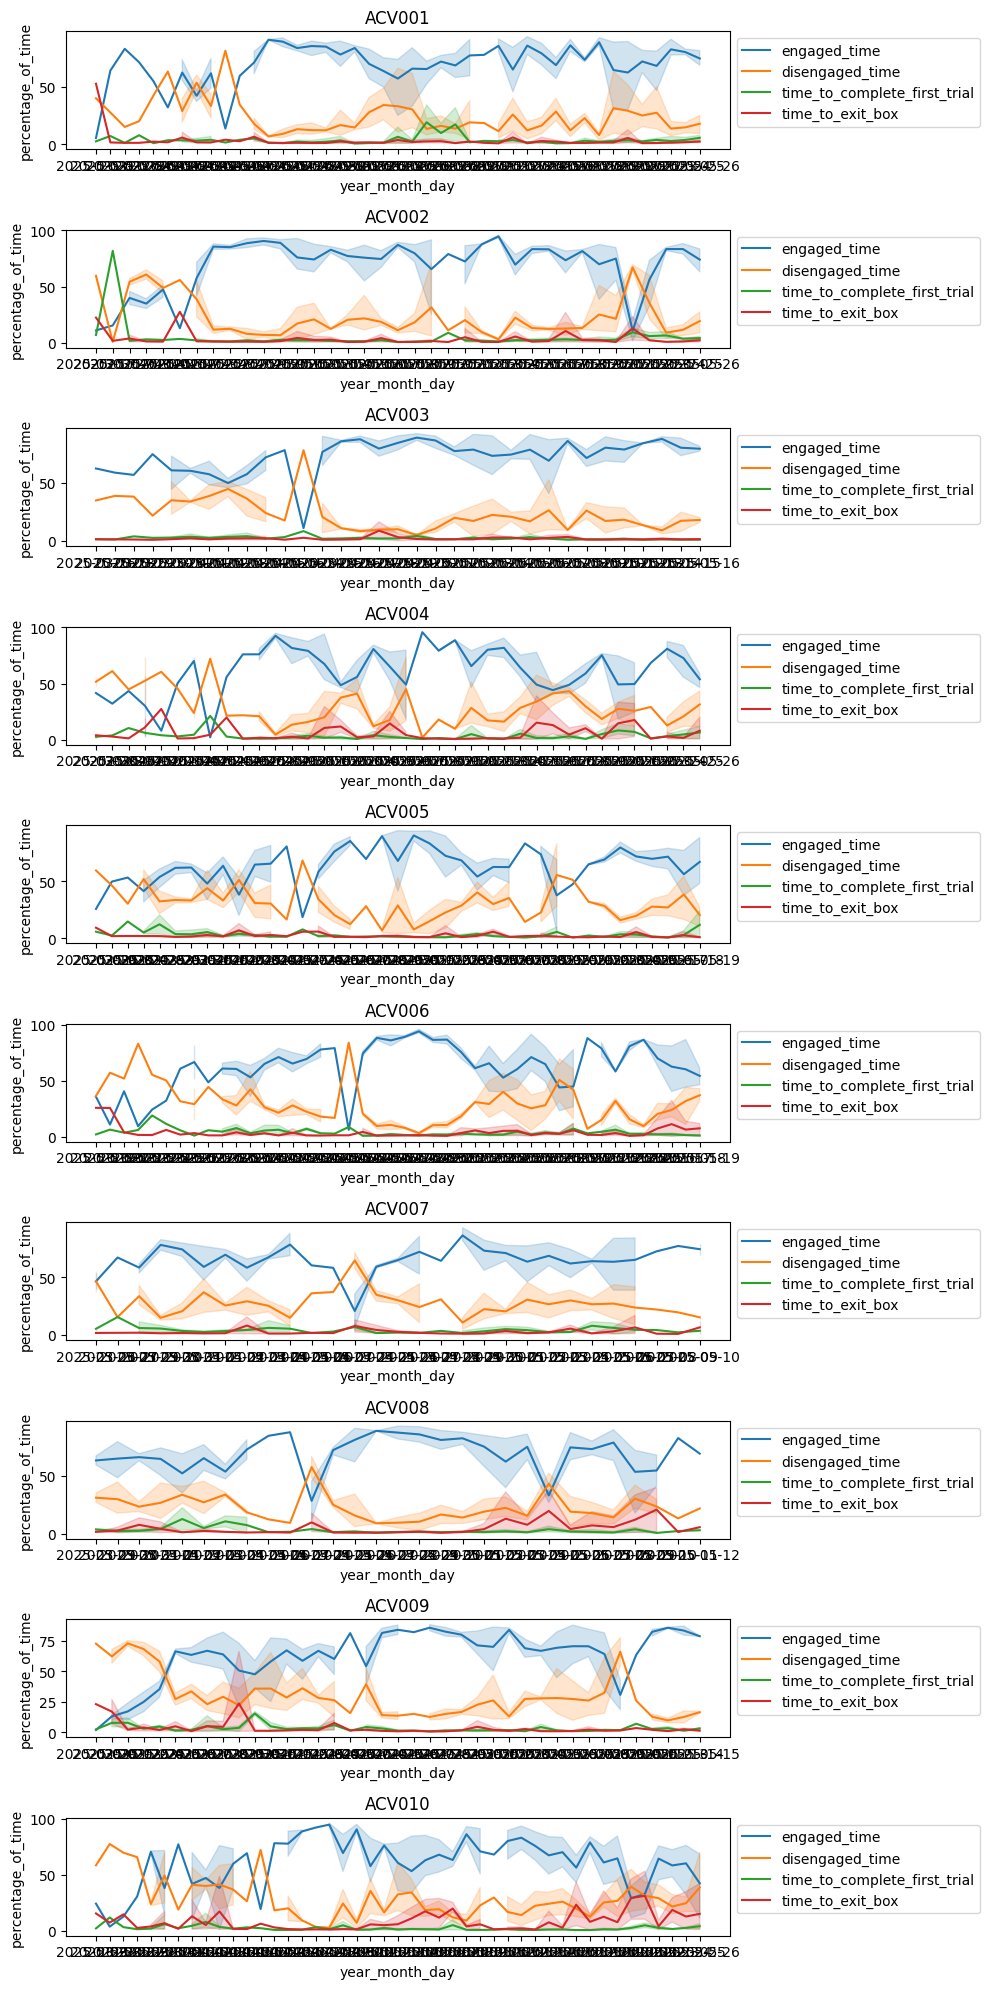

In [45]:
# plot this for each subject
gsbu_df = dft.add_day_column_to_df(gsbu_df)
fig, axs = plt.subplots(nrows=len(gsbu_df.subject.unique()), ncols=1, figsize=(10,20))
axs = axs.ravel()
for i, sel_sub in enumerate(gsbu_df.subject.unique()):
    gsbu_df_sel = gsbu_df[gsbu_df['subject'] == sel_sub].copy()
    hue_order = ['engaged_time', 'disengaged_time', 'time_to_complete_first_trial', 'time_to_exit_box']
    axs[i].set_title(sel_sub)
    sns.lineplot(data=gsbu_df_sel, x='year_month_day', y='percentage_of_time', hue='time_type', ax=axs[i], hue_order=hue_order)
    # show legend on the right outside the plot
    axs[i].legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

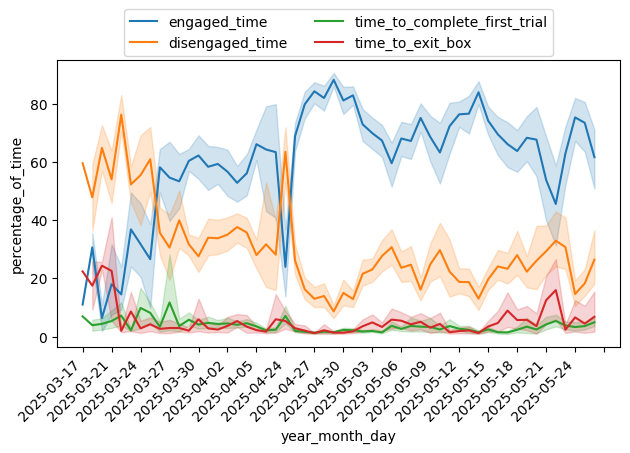

In [53]:
# show all mixed
# sort by date
gsbu_df = gsbu_df.sort_values(by='year_month_day')
sns.lineplot(data=gsbu_df, x='year_month_day', y='percentage_of_time', hue='time_type', estimator='mean', hue_order=hue_order)
# align x ticks to the end
plt.xticks(rotation=45, ha='right')
# legend on top of the plot on one row
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)
# don't show more than 20 x ticks
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))
plt.tight_layout()
plt.show()

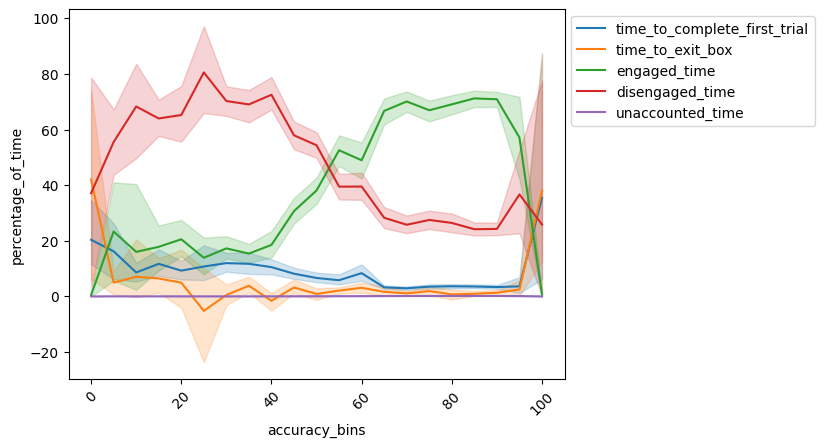

In [35]:
# same but match to accuracy
gsbu_df["accuracy_bins"] = gsbu_df["accuracy"] // 5 * 5
sns.lineplot(data=gsbu_df, x='accuracy_bins', y='percentage_of_time', hue='time_type', estimator='mean')
plt.xticks(rotation=45)
# legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [54]:
# look for differences between day and night sessions!!!
gsbu_df["is_day_session"] = gsbu_df["date"].apply(is_day_session)

In [55]:
gsbu_df.is_day_session.value_counts()

is_day_session
False    2500
True     1950
Name: count, dtype: int64

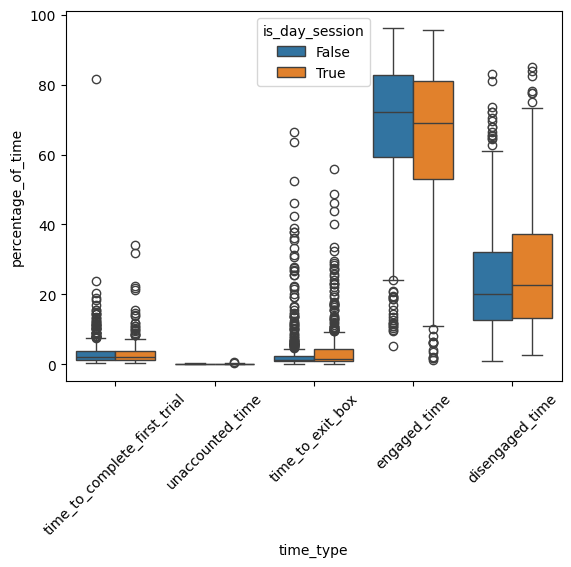

In [56]:
sns.boxplot(data=gsbu_df, x='time_type', y='percentage_of_time', hue='is_day_session')
plt.xticks(rotation=45)
plt.show()

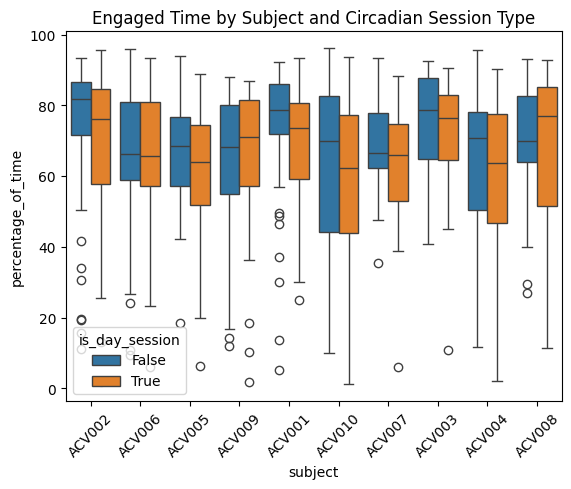

In [57]:
# compare the engaged time across day and night sessions per subject
# for engaged time only:
sns.boxplot(data=gsbu_df[gsbu_df['time_type'] == 'engaged_time'], x='subject', y='percentage_of_time', hue='is_day_session')
plt.xticks(rotation=45)
plt.title('Engaged Time by Subject and Circadian Session Type')
plt.show()

In [58]:
# show it as a mean per animal once the accuracy is high
gsbu_df_sel = gsbu_df[(65 < gsbu_df['accuracy']) & (gsbu_df['accuracy'] < 95)]
gsbu_df_sel_gb = gsbu_df_sel.groupby(['subject', 'is_day_session' , 'time_type'])["percentage_of_time"].mean().reset_index()

In [59]:
gsbu_df_sel_gb.time_type.unique()

array(['disengaged_time', 'engaged_time', 'time_to_complete_first_trial',
       'time_to_exit_box', 'unaccounted_time'], dtype=object)

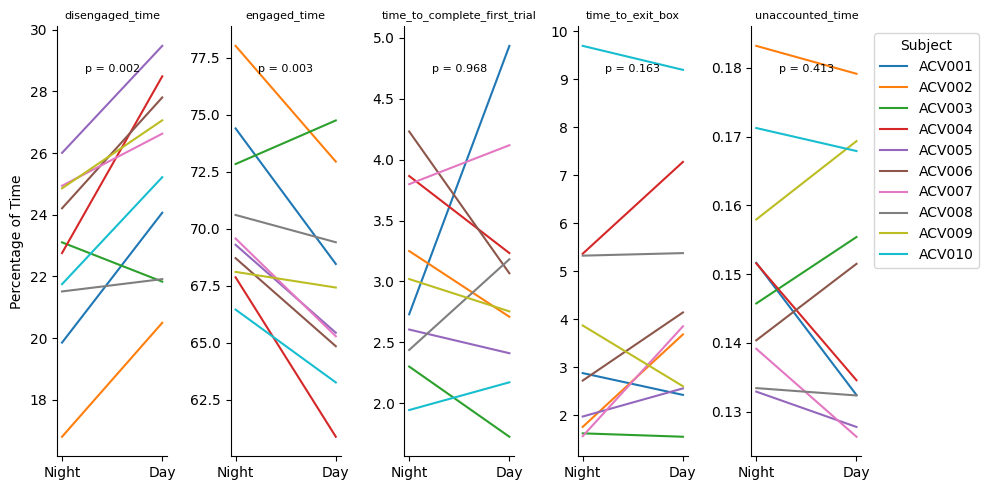

In [60]:
from scipy.stats import ttest_rel
fig, axs = plt.subplots(ncols=len(gsbu_df_sel_gb.time_type.unique()), nrows=1, figsize=(10,5))
axs = axs.ravel()
for i, time_type in enumerate(gsbu_df_sel_gb['time_type'].unique()):
    tt_df = gsbu_df_sel_gb[gsbu_df_sel_gb['time_type'] == time_type]
    sns.lineplot(data=tt_df, x="is_day_session", y="percentage_of_time", hue="subject", estimator=None, marker="", ax=axs[i])
    axs[i].set_title(time_type, fontsize=8)
    axs[i].set_xticks([0, 1], ["Night", "Day"])
    # remove legend
    axs[i].legend([],[], frameon=False)
    axs[i].set_ylabel("")
    axs[i].set_xlabel("")
    # add stats
    day_values = tt_df[tt_df["is_day_session"] == True]["percentage_of_time"].values
    night_values = tt_df[tt_df["is_day_session"] == False]["percentage_of_time"].values
    _, p_value = ttest_rel(night_values, day_values)
    axs[i].text(0.5, 0.9, f'p = {p_value:.3f}', transform=axs[i].transAxes, ha='center', va='center', fontsize=8)
    # despine
    sns.despine(ax=axs[i])  # add despine for better aesthetics
axs[0].set_ylabel("Percentage of Time")
plt.legend(title="Subject", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
# plt.show()
# save figure as .pdf
plt.savefig('figures/hmv_engagement_circadian_differences.pdf', bbox_inches='tight', transparent=True)

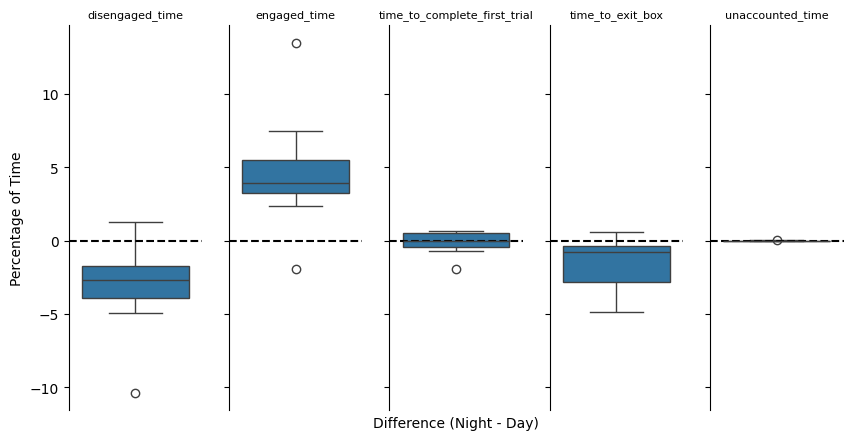

In [147]:
# plot it as the difference between day and night sessions
fig, axs = plt.subplots(ncols=len(gsbu_df_sel_gb.time_type.unique()), nrows=1, figsize=(10,5), sharey=True)
axs = axs.ravel()
for i, time_type in enumerate(gsbu_df_sel_gb['time_type'].unique()):
    tt_df = gsbu_df_sel_gb[gsbu_df_sel_gb['time_type'] == time_type]
    # get the difference between day and night sessions per mouse
    difs = []
    for subject in tt_df['subject'].unique():
        day_value = tt_df[(tt_df['is_day_session'] == True) & (tt_df['subject'] == subject)]['percentage_of_time'].values[0]
        night_value = tt_df[(tt_df['is_day_session'] == False) & (tt_df['subject'] == subject)]['percentage_of_time'].values[0]
        difs.append(- day_value + night_value)
    sns.boxplot(data=pd.DataFrame({'difference': difs}), y='difference', ax=axs[i])
    axs[i].set_title(time_type, fontsize=8)
    axs[i].set_ylabel("Percentage of Time")
    # despine
    sns.despine(ax=axs[i])  # add despine for better aesthetics
    axs[i].set_xticks([])  # remove x-ticks
    axs[i].set_xlabel("")  # remove x-label
    # remove x line
    axs[i].spines['bottom'].set_visible(False)
    # horizontal line at 0
    axs[i].axhline(0, color='black', linestyle='--')
axs[2].set_xlabel("Difference (Night - Day)")

plt.show()


In [47]:
gsbu_df_sel_gb

,subject,is_day_session,time_type,percentage_of_time
0,ACV001,False,disengaged_time,14.456826
1,ACV001,False,engaged_time,83.280553
2,ACV001,False,time_to_complete_first_trial,3.479796
3,ACV001,False,time_to_exit_box,-1.367582
4,ACV001,False,unaccounted_time,0.150406
...,...,...,...,...
95,ACV010,True,disengaged_time,18.170506
96,ACV010,True,engaged_time,74.440361
97,ACV010,True,time_to_complete_first_trial,2.631613
98,ACV010,True,time_to_exit_box,4.583866
